In [6]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the data
mother_df = pd.read_csv("../data/mother.csv")
mother_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   geographic_area           955 non-null    object 
 1   indicator                 955 non-null    object 
 2   sex                       955 non-null    object 
 3   current_age               955 non-null    object 
 4   wealth_quintile           955 non-null    object 
 5   residence                 955 non-null    object 
 6   mother's_education_level  955 non-null    object 
 7   time_period               955 non-null    int64  
 8   obs_value                 955 non-null    float64
 9   sub_sector                955 non-null    object 
 10  risk_category             955 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 82.2+ KB


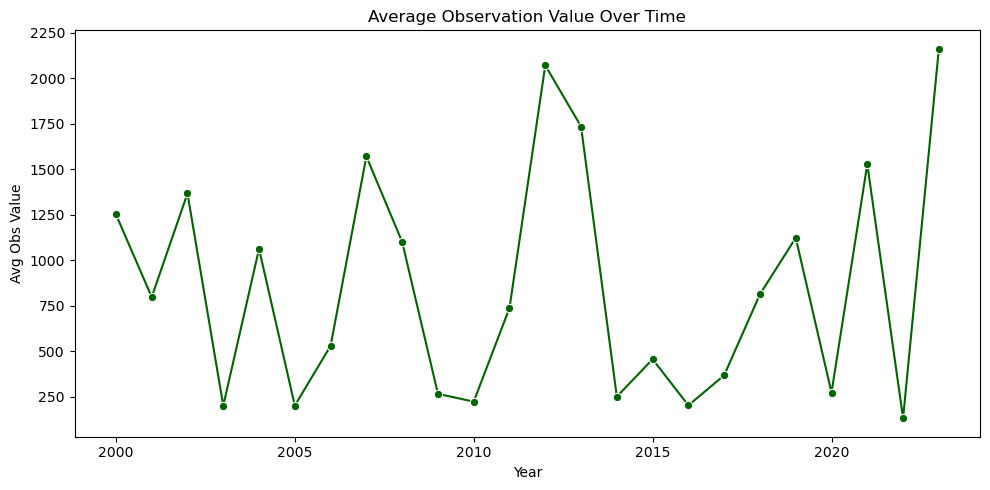

In [8]:
# Group by year
avg_yearly = mother_df.groupby("time_period")["obs_value"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_yearly, x="time_period", y="obs_value", marker="o", color="darkgreen")
plt.title("Average Observation Value Over Time")
plt.ylabel("Avg Obs Value")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

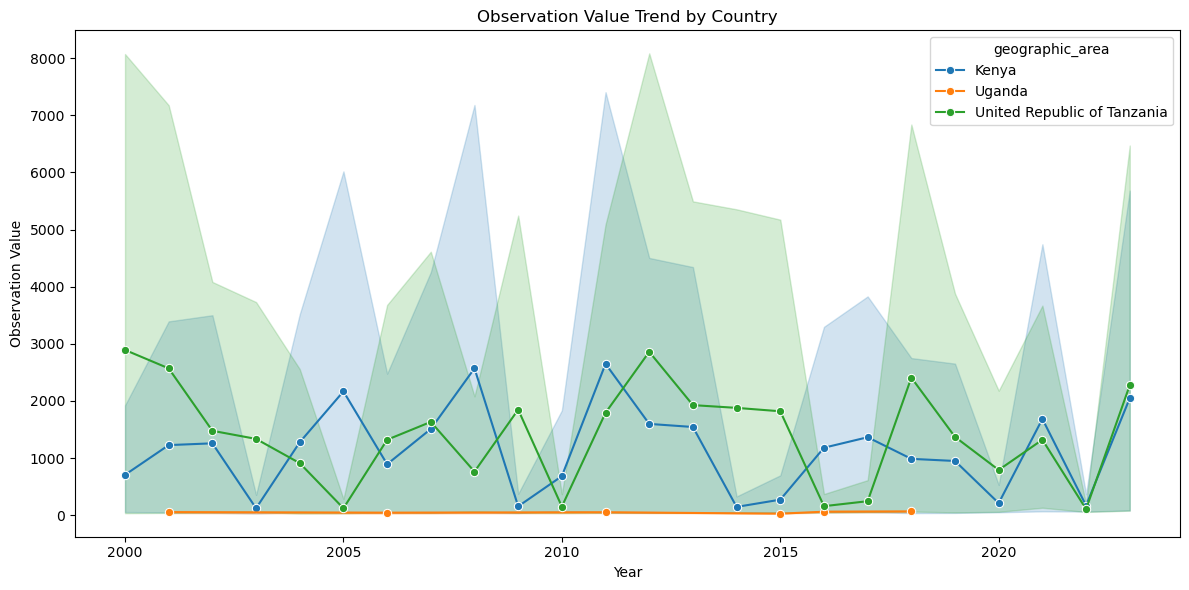

In [9]:
# Plot trend by risk category
plt.figure(figsize=(12, 6))
sns.lineplot(data=mother_df, x="time_period", y="obs_value", hue="geographic_area", marker="o")
plt.title("Observation Value Trend by Country")
plt.xlabel("Year")
plt.ylabel("Observation Value")
plt.tight_layout()
plt.show();

In [11]:
# Risk Category Distribution (by Country) ---
print("\n. Risk Category Distribution by Country:")
risk_dist_country = mother_df.groupby(['geographic_area', 'risk_category']).size().unstack(fill_value=0)
print(risk_dist_country)


. Risk Category Distribution by Country:
risk_category                High  Low  Medium
geographic_area                               
Kenya                         115  112     222
Uganda                         18   18      30
United Republic of Tanzania   113  111     216


## Observation

### High-Risk Country Focus
<b>Kenya</b> and <b>Tanzania</b> contribute the highest number of high-risk cases:

Kenya: 115 | Tanzania: 113 | Uganda: 18

<b><i>Recommendation<i/></b>: Deploy targeted health interventions especially in Kenya and Tanzania.

In [12]:
# Risk by Mother's Education ---
print("\n. Risk Category vs. Mother's Education Level:")
education_risk = mother_df.groupby("mother's_education_level")['risk_category'].value_counts().unstack(fill_value=0)
print(education_risk)


. Risk Category vs. Mother's Education Level:
risk_category                                       High  Low  Medium
mother's_education_level                                             
never attended an education programme / no scho...     1    4       4
primary education                                      3    2       4
secondary and higher                                   1    1       7
total                                                241  234     453


## Observation

### Education as a Strong Predictor
#### High-risk percentages by education level:

- Secondary and higher:11.1%

- Primary education: 33.3%

- No schooling: 11.1%

<b><i>Recommendation<i/></b>: Promote women's education and tailor maternal health interventions based on education levels to reduce health risks across all categories.



. Sub-sector Risk Breakdown:
risk_category       High  Low  Medium
sub_sector                           
ANTENATAL             56   56     105
DELIVERY              64   64     123
FAMILY_PLANNING        9    8      14
FERTILITY             15   15      28
MALA                  53   51     101
MATERNAL_MORTALITY    36   34      74
POSTNATAL_CARE        13   13      23


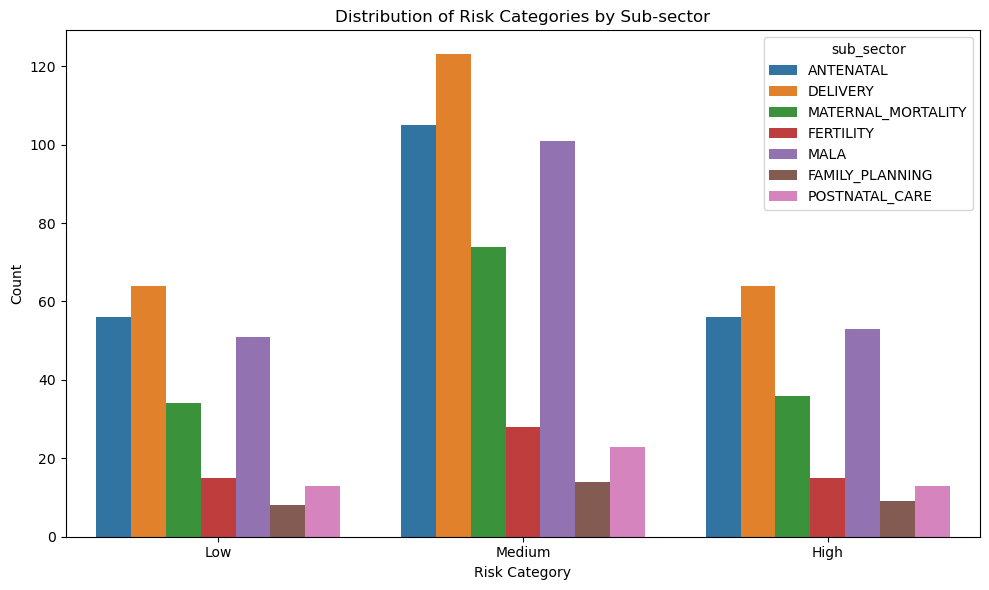

In [13]:
# Sub-sector Summary by Risk ---
print("\n. Sub-sector Risk Breakdown:")
sub_sector_summary = mother_df.groupby('sub_sector')['risk_category'].value_counts().unstack()
print(sub_sector_summary)

plt.figure(figsize=(10, 6))
sns.countplot(data=mother_df, x='risk_category', hue='sub_sector')
plt.title("Distribution of Risk Categories by Sub-sector")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Observation

- `DELIVERY` and `MALA (Malaria)` have the highest counts across all risk levels, indicating more data and possibly greater public health concern.

- `FAMILY PLANNING` and `POSTNATAL_CARE` have fewer observations but still span all risk categories.

In [14]:
# Delivery Rates by Wealth Quintile (All Countries, All Years
print("\n. 💰 Delivery Rates by Wealth Quintile (All Countries, All Years):")
filtered_delivery = mother_df[
    (mother_df['sub_sector'] == 'DELIVERY') & 
    (mother_df['wealth_quintile'] != 'total')
]

# Group by country, year, and wealth quintile, then calculate mean diarrhea rates
delivery_by_wealth = filtered_delivery.groupby(
    ['geographic_area', 'time_period', 'wealth_quintile']
)['obs_value'].mean().sort_index()

print(delivery_by_wealth)


. 💰 Delivery Rates by Wealth Quintile (All Countries, All Years):
geographic_area              time_period  wealth_quintile
Kenya                        2003         fourth             37.100000
                                          highest            53.466667
                                          lowest             11.400000
                                          middle             25.766667
                                          second             22.400000
                             2009         fourth             37.133333
                                          highest            58.866667
                                          lowest             13.433333
                                          middle             29.966667
                                          second             21.600000
                             2014         fourth             57.333333
                                          highest            68.133333
                       

## Observation

<b>General Pattern</b>: Across both Kenya and Tanzania, delivery rates were historically higher among the wealthiest groups, but by 2022, this pattern shifted, with lower wealth quintiles closing the gap or surpassing higher quintiles.


`Kenya`:
2003–2014: Delivery rates were strongly correlated with wealth—highest quintile had significantly better access (e.g., 2003: 53.5% vs. 11.4% in the lowest).
By 2022: The trend reversed—lowest quintile (49.7%) nearly matched or exceeded the highest (53.8%).
Suggests increased equity in delivery access, likely due to nationwide maternal health programs or community-based services reaching the poor.

`Tanzania`:
2005–2016: Wealthier quintiles consistently had better delivery rates (e.g., 2016: highest at 68.5% vs. lowest at 28.5%).
By 2022: The difference narrowed significantly—lowest quintile reached 45.2%, approaching the highest (57.3%), indicating progressive improvement in health service access among the poor.

`Key Insight`: While wealthier groups historically had better maternal delivery outcomes, recent trends show narrowing disparities, especially by 2022. This shift highlights the impact of universal health initiatives, community-level interventions, and possibly increased rural outreach programs. However, delivery rates are still below optimal for all groups, especially among the poorest.

In [16]:
# Urban vs Rural Delivery Rates (All Countries, All Years) - Exclude 'total'
print("\na.Urban vs Rural Delivery Rates (All Countries, All Years):")
urban_delivery_full = mother_df[
    (mother_df['sub_sector'] == 'DELIVERY') & 
    (mother_df['residence'] != 'total')
].groupby(['geographic_area', 'time_period', 'residence'])['obs_value'].mean().unstack()
print(urban_delivery_full)

# Urban vs Rural Postnatal care Rates (All Countries, All Years) - Exclude 'total'
print("\nb. 🏡 Urban vs Rural Postnatal care Rates (All Countries, All Years):")
postnatal_care = mother_df[
    (mother_df['sub_sector'] == 'POSTNATAL_CARE') & 
    (mother_df['residence'] != 'total')
].groupby(['geographic_area', 'time_period', 'residence'])['obs_value'].mean().unstack()
print(postnatal_care)


a.Urban vs Rural Delivery Rates (All Countries, All Years):
residence                                    rural      urban
geographic_area             time_period                      
Kenya                       2000         34.400000  63.800000
                            2003         23.500000  50.533333
                            2006         32.600000  66.200000
                            2009         25.766667  53.600000
                            2014         35.066667  59.700000
                            2022         51.850000  54.350000
Uganda                      2001         22.500000  55.666667
                            2006         25.233333  55.800000
                            2011         36.066667  63.933333
                            2016         48.133333  62.800000
United Republic of Tanzania 2005         25.300000  56.033333
                            2010         28.466667  58.166667
                            2016         37.466667  61.733333
         

## Observation
a. Urban vs Rural Diarrhea Rates (All Countries, All Years)
Key Observations:
Urban areas consistently had higher delivery rates than rural areas across all countries and years.

Kenya (2000–2014): Urban delivery rates ranged from 50–66%, while rural rates lagged behind.

Uganda (2001–2016): Urban rates were more than double rural rates in early years.

Tanzania (2005–2016): Urban rates consistently ~60%, rural rates were around 25–37%.

By 2022, rural areas in all three countries had significantly improved:

Kenya: Urban 54.4%, rural 51.9% → almost equal.

Tanzania: Urban 55.4%, rural 49.2% → gap narrowed.

Interpretation:  This shows a closing access gap, likely due to successful rural health campaigns, infrastructure development, and mobile clinics.

b. Urban vs Rural Pneumonia Vaccination Rates (All Countries, All Years)
Urban mothers have consistently higher access to postnatal care across all countries.

Kenya (2014): Urban = 67.5%, Rural = 44.7%

Uganda (2016): Urban = 66.8%, Rural = 50.9%

Tanzania (2022): Urban = 59.8%, Rural = 47.0%

However, rural areas are showing substantial gains:

Kenya’s rural rate jumped from 44.7% (2014) to 74.1% (2022)

Interpretation:
While urban advantage persists, rural mothers are increasingly accessing postnatal care, suggesting successful community outreach and demand-side interventions.

In [17]:
# Delivery Rate Over Time (All Countries) ---
print("\n7. Diarrhea Rate Over Time (All Countries):")
delivery_all = mother_df[mother_df['sub_sector'] == 'DELIVERY']
delivery_time_trend_all = delivery_all.groupby(['geographic_area', 'time_period'])['obs_value'].mean()
print(delivery_time_trend_all)


7. Diarrhea Rate Over Time (All Countries):
geographic_area              time_period
Kenya                        2000           46.933333
                             2003           31.353571
                             2006           45.966667
                             2009           34.175000
                             2014           44.796429
                             2016           70.200000
                             2022           55.317647
Uganda                       2001           39.083333
                             2006           40.516667
                             2011           50.000000
                             2016           55.466667
United Republic of Tanzania  2005           34.578571
                             2010           37.871429
                             2016           45.621429
                             2022           52.122857
Name: obs_value, dtype: float64


## Observation

- All countries show non-linear trends, indicating varying intervention success or changes in data/reporting quality.

- Kenya shows the most consistent rise over time.

- Tanzania had the highest rate in 2005 but saw improvement before rising again.

- Uganda showed a sharp rise in 2016, needing further investigation.

`Kenya`
Kenya
Shows the most consistent rise in diarrhea prevalence over time:

From 34.2% in 2009 to 70.2% in 2016, slightly declining to 55.3% in 2022.

Interpretation: Despite improvements in healthcare access, diarrhea remains a persistent issue, possibly tied to urban crowding, poor sanitation, or climate-related factors.

`Uganda`
Rates increased from 39.1% in 2001 to 55.5% in 2016, with a notable spike in 2016.

Interpretation: The 2016 jump may reflect actual deterioration in water/sanitation or enhanced surveillance/reporting. Further investigation is needed.

`Tanzania`
-Initially had the highest rate in 2005 (34.6%), dropped in 2010 (37.9%), then rose again by 2022 (52.1%).

Interpretation: Short-term gains may have been reversed due to infrastructure strain or population growth, especially in urban areas.

In [24]:
# Compute mean obs_value per indicator
indicator_means = mother_df.groupby('indicator')['obs_value'].mean()

# Select top 5 indicators based on mean obs_value
top_10_indicators = indicator_means.sort_values(ascending=False).head(10).index.tolist()

# Filter original data to include only these top 5 indicators
top10_df = mother_df[mother_df['indicator'].isin(top_10_indicators)]

# Group by indicator and geographic_area, compute mean obs_value
top10 = top10_df.groupby(['indicator', 'geographic_area'])['obs_value'].mean().reset_index()

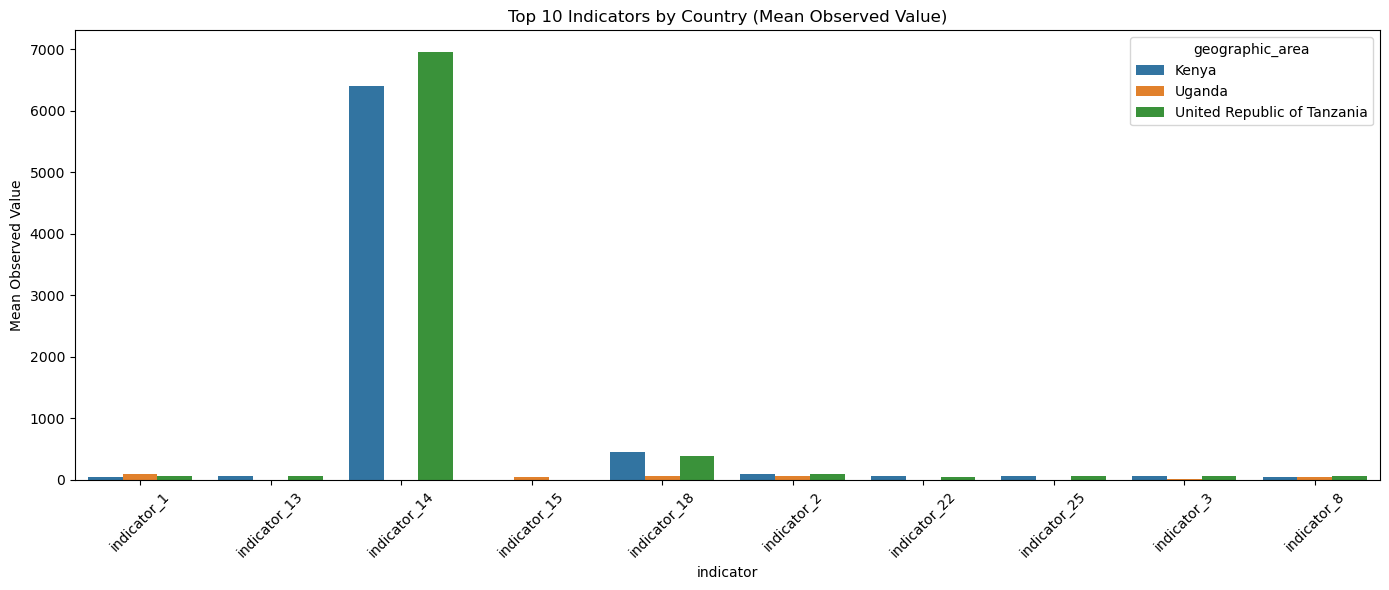

In [25]:
plt.figure(figsize=(14, 6))
sns.barplot(data=top10, x='indicator', y='obs_value', hue='geographic_area')
plt.title("Top 10 Indicators by Country (Mean Observed Value)")
plt.ylabel("Mean Observed Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14584\2449727544.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


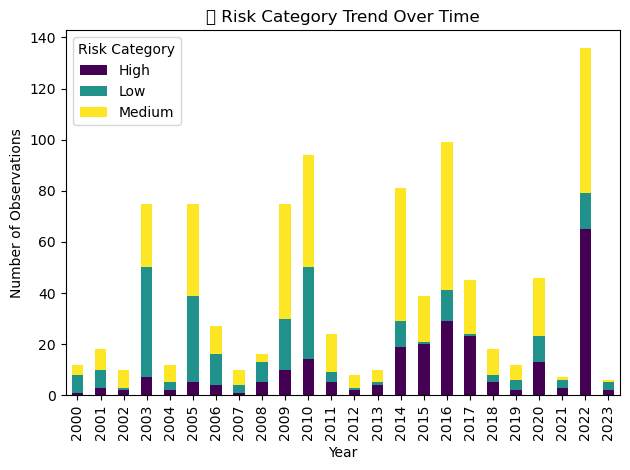

In [26]:
# Group and pivot the data
risk_time = mother_df.groupby(['time_period', 'risk_category']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
risk_time.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('📊 Risk Category Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.legend(title='Risk Category')
plt.tight_layout();